# 🎵 HarmonAIze — Model Building Notebook

This notebook builds modles for recommending sonGs on a curated subset of the **Spotify 1 Million Tracks** dataset.

We’ll perform:

1. Data visualization
2. Data cleaning (drop nulls, duplicates)
3. Feature selection (audio-based features only)
4. Normalization and encoding
5. Saving processed data

---


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from sklearn.neighbors import KNeighborsClassifier

In [3]:
data = pd.read_csv("../../data/processed/spotify_features.csv")

X = data
print(f"The shape of the data set is: {X.shape}")
X.head()

The shape of the data set is: (1159748, 13)


,track_name,artist_name,danceability,energy,valence,acousticness,instrumentalness,liveness,speechiness,tempo,loudness,duration_sec,popularity
0,I Won't Give Up,Jason Mraz,-0.295121,-1.244639,-1.178954,1.049226,-0.691216,-0.537222,-0.393524,0.403917,-0.189488,-0.062859,3.123384
1,93 Million Miles,Jason Mraz,0.187328,-0.686411,0.221331,0.437937,-0.691179,-0.624753,-0.528338,0.631455,-0.229613,-0.221997,1.990284
2,Do Not Let Me Go,Joshua Hyslop,-0.696259,-1.499723,-1.156609,0.046373,-0.691079,-0.664042,-0.477093,0.619702,-0.832373,-0.606319,2.430934
3,Fast Car,Boyce Avenue,-0.788412,-1.436876,0.195262,1.367548,-0.691216,-0.712781,-0.445557,2.806734,-0.152002,0.366301,2.493884
4,Sky's Still Blue,Andrew Belle,-0.582422,0.559434,-0.888469,-0.701259,-0.638350,-0.562088,-0.493649,1.695337,0.626921,-0.035059,2.242084


In [4]:
unique_artists = X['artist_name'].unique()
print(len(unique_artists))
print(unique_artists)

64158
['Jason Mraz' 'Joshua Hyslop' 'Boyce Avenue' ... 'Air Night' 'Aiera'
 'Snakefarm']


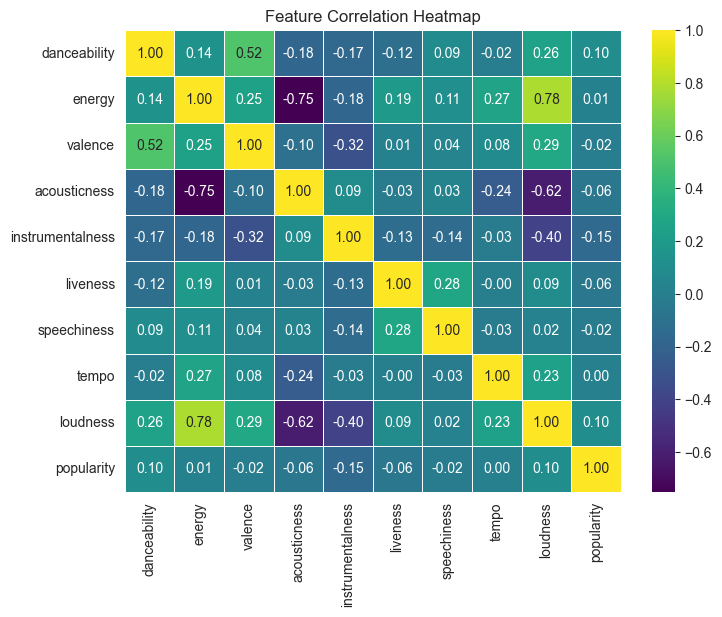

In [93]:
data_vis = X
data_vis = data_vis.drop(columns=["artist_name", "track_name", "duration_sec"], axis=1)

correlation_matrix = data_vis.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Feature Correlation Heatmap')
plt.show()

The heatmap produced from the dataset shows that the following variables are highley correlative:
- energy and loudness
- danceability and valence

THe following features are inversely correlated:
- acousticness and loudness
- acousticness and energy

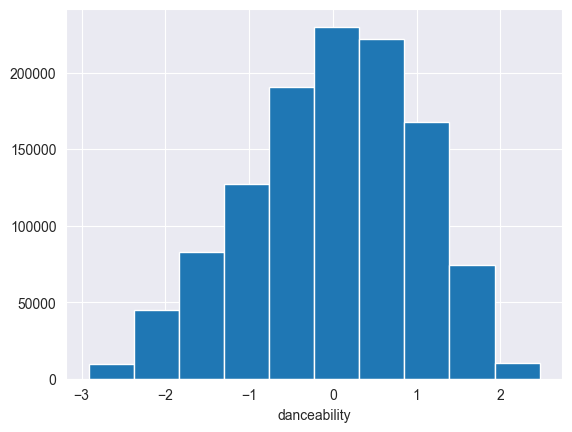

In [94]:
attr = "danceability"


plt.hist(data_vis[attr], bins=10)
plt.xlabel(attr)
plt.show()

## Principal Component Analysis

In [95]:
data_num = data_vis

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_num)
cols = scaled_data.shape[1]

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=principal_components)
print(pca.explained_variance_ratio_)
print(pca_df.shape)
pca_df.head()

[0.29239377 0.14633295]
(1159748, 2)


,0,1
0,-1.197338,0.507259
1,-0.192476,0.916240
2,-1.330757,-0.050246
3,-0.721888,0.350246
4,1.103351,-1.147510


In [97]:
RANDOM_STATE = 42
X_train, X_test = train_test_split(X, test_size=0.25, random_state = RANDOM_STATE)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (869811, 13)
Shape of X_test: (289937, 13)


## K Means
The determine a strong number of clusters for this data set, we will measure the Within-Cluster Sum of Squares (WCCS) for each possible k, to identify the "elbow point"

WCCS for 5: 1047036.354090066
WCCS for 10: 560802.1524246263
WCCS for 50: 123851.69840757025
WCCS for 100: 63721.035616184265
WCCS for 200: 32695.841986319152
WCCS for 500: 13259.977952835225
WCCS for 1000: 6654.014990560607
WCCS for 1250: 5331.695396331374
WCCS for 1500: 4440.325364145207


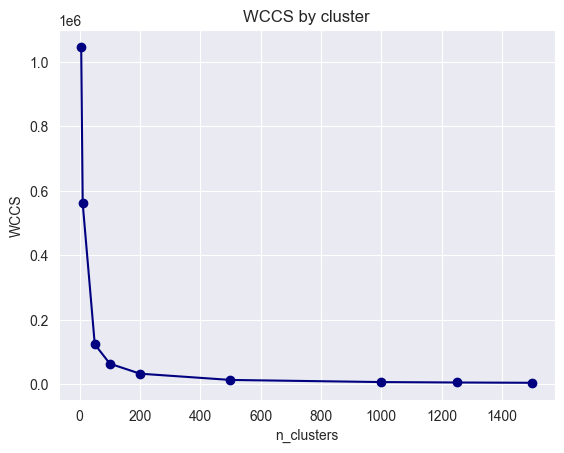

KeyboardInterrupt: 

KeyboardInterrupt: 

In [11]:
pca_np = pca_df.to_numpy()
n_clusters = [5, 10, 50, 100, 200, 500, 1000, 1250, 1500]
WCCS = []

for k in n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    kmeans.fit(pca_np)

    inertia = kmeans.inertia_
    WCCS.append(inertia)
    print(f"WCCS for {k}: {inertia}")



plt.plot(n_clusters, WCCS, color="navy", marker="o")
plt.xlabel("n_clusters")
plt.ylabel("WCCS")
plt.title("WCCS by cluster")
plt.show()


labels = kmeans.labels_
centers = kmeans.cluster_centers_
# took 43 mins

WCCS for 900: 7404.493364117585
WCCS for 1000: 6654.014990560607
WCCS for 1100: 6056.988611396544
WCCS for 1200: 5549.394745729058
WCCS for 1300: 5131.824219577855
WCCS for 1400: 4757.300789463736
WCCS for 1500: 4440.3253641452075


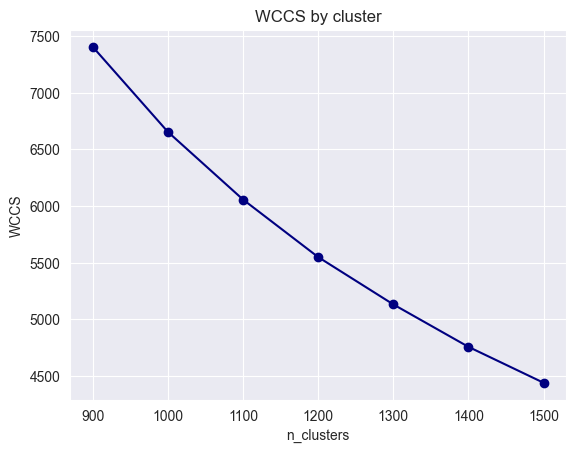

In [119]:
n_clusters = [900, 1000, 1100, 1200, 1300, 1400, 1500]
WCCS = []

for k in n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    kmeans.fit(pca_np)

    inertia = kmeans.inertia_
    WCCS.append(inertia)
    print(f"WCCS for {k}: {inertia}")



plt.plot(n_clusters, WCCS, color="navy", marker="o")
plt.xlabel("n_clusters")
plt.ylabel("WCCS")
plt.title("WCCS by cluster")
plt.show()
# took 1h 13m

In [129]:
# plt.figure(figsize=(12, 8))
# plt.scatter(pca_np[:, 0], pca_np[:, 1], c=labels, cmap='viridis', s=1, alpha=0.8, facecolors="none")
# plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=10, label='Centroids')
# plt.title('K-Means Clustering (2D Data)')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend()
# plt.grid(True)
# plt.show()